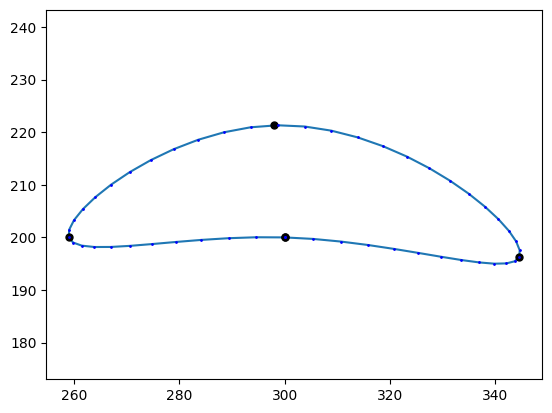

In [ ]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from curves import *
from mechanisms.fourbar import FourBar
import matplotlib.animation as animation
from IPython.display import HTML

# Example usage
# points = [[0,0], [5,0], [1,1], [0,1],[0,0]]

points = [[300,200], [344.59,196.26], [297.93,221.3], [258.97,200],[300,200]]

spline = ClosedSpline(points, n=50)

def opt_fun(x):
    #circle_x,circle_y=circle([x[0],x[1]], x[2],50)
    circle_x,circle_y=elipse([x[0],x[1]], x[2],x[3],50)
    return CompareCurves(spline.xx,spline.yy,circle_x,circle_y)

# Prueba con circulo
#opt_out=scipy.optimize.least_squares(opt_fun,[0,0,1],bounds=([-1,-1,0.1],[4,4,5]))
#circle_x,circle_y=circle([opt_out.x[0],opt_out.x[1]], opt_out.x[2],50)

#Prueba con elipse
opt_out=scipy.optimize.least_squares(opt_fun,[0,0,3,1],bounds=([-1,-1,0.1,0.1],[4,4,5,5]))
circle_x,circle_y=elipse([opt_out.x[0],opt_out.x[1]], opt_out.x[2],opt_out.x[3],50)

spline.plot()
#plt.plot(circle_x,circle_y,'.')
opt_out

fourbar=FourBar(2,1,1.2,1.8)



In [4]:
# For a set of lengths compute the trayectory
points = [[0,0], [5,0], [1,1], [0,1],[0,0]]
trajectory_star = ClosedSpline(points, n=40)

def GetTrajectory(fourbar):
    theta_array = np.linspace(0+0.4, 2*np.pi+0.4, 40)
    trajectory=np.zeros((len(theta_array),2))
    for i in range(len(theta_array)):
        theta1=theta_array[i]
        [theta2,theta3],fkout=fourbar.FK(theta1)
        if fkout.cost>1e-3:
            er=np.nan
            break
        points=fourbar.ComputePoints(theta1,theta2,theta3)
        marker=points['A']+0.5*np.array([np.cos(theta2),np.sin(theta2)])
        trajectory[i,:]=marker
    return trajectory[0:i+1,:]

def opt_fun(x):
    fourbar=FourBar(*x[0:4])
    fourbar.setOloc(*x[4:6])
    trajectory=GetTrajectory(fourbar)
    if len(trajectory)<40:
        er=1000
    else:
        er=CompareCurves(trajectory_star.xx,trajectory_star.yy,trajectory[:,0],trajectory[:,1])
    return er

x0=[2,1,1.8,1.8,0,0]
out_opt=scipy.optimize.least_squares(opt_fun,x0,bounds=([0.1,0.1,0.1,0.1,-2,-2],[5,5,5,5,2,2]),method='dogbox')
out_opt

     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 1.220e+00]
           x: [ 1.977e+00  1.621e+00  1.976e+00  1.603e+00  4.254e-01
               -1.457e-01]
        cost: 0.7440471455675115
         jac: [[-3.679e-01  2.358e+06  3.543e-01  2.384e+06 -6.157e-01
                 1.038e-01]]
        grad: [-4.487e-01  2.876e+06  4.322e-01  2.909e+06 -7.511e-01
                1.266e-01]
  optimality: 2908661.0630487287
 active_mask: [0 0 0 0 0 0]
        nfev: 12
        njev: 5

In [3]:
lengths_star=out_opt.x[0:4]
fourbar_star=FourBar(*lengths_star[0:4])
fourbar_star.setOloc(*out_opt.x[4:6])


theta_array = np.linspace(0+0.4, 2*np.pi+0.4, 40)

fig, ax = plt.subplots()
markers = np.zeros((len(theta_array),2))
def update(frame):
    ax.cla()
    theta1=theta_array[frame]
    [theta2,theta3],out=fourbar_star.FK(theta1)
    points=fourbar_star.ComputePoints(theta1,theta2,theta3)
    fourbar_star.plot(theta_array[frame],ax=ax,theta2=theta2,theta3=theta3)
    marker=points['A']+0.5*np.array([np.cos(theta2),np.sin(theta2)])
    markers[frame,:]=marker
    ax.plot(markers[0:frame+1,0],markers[0:frame+1,1],'r-')
    ax.plot(markers[frame,0],markers[frame,1],'r*')
    ax.plot(trajectory_star.xx,trajectory_star.yy,'b.')
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    
ani = animation.FuncAnimation(fig, update, frames=len(theta_array), interval=50)

plt.close(fig)
HTML(ani.to_jshtml())

NameError: name 'out_opt' is not defined

In [5]:
## Save trayectories 

# 40 points
lengths_sweep=np.linspace(0.1,5,10)
xx=np.meshgrid(lengths_sweep,lengths_sweep,lengths_sweep,lengths_sweep)
xx_flat = np.array([x.flatten() for x in xx])

#for i in range(0,xx[0].shape[0]):
#    for j in range(0,xx[0].shape[1]):

for i in range(0,xx_flat[0].shape[0]):
    xi=xx_flat[:,i]
    fourbar=FourBar(*xi)
    traj=GetTrajectory(fourbar)
    print(traj)
    plt.plot(traj[:,0],traj[:,1])
    error


ValueError: operands could not be broadcast together with shapes (4,) (2,) 

In [3]:
fourbar.ComputePoints(0.0)

TypeError: loop of ufunc does not support argument 0 of type OptimizeResult which has no callable cos method